# SUPPORT VECTOR REGRESSION

Support Vector Regression(SVR) adalah teknik Supervised Learning yang mengadopsi teknik Support Vector Machine(SVM). Yang membedakan adalah SVR menggunakan hyperplane sebagai dasar untuk membuat margin dan garis pembatas.

Apakah yang membedakan SVR dengan regresi linear?
<br>Pada regresi linear, kita membuat model berdasarkan perhitungan error yang paling kecil. Sedangkan pada SVR, kita membatasi error pada treshold tertentu.

Untuk lebih jelasnya perhatikan gambar berikut.

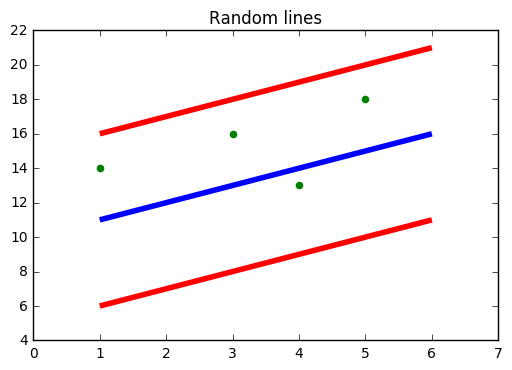

biru: hyperplane<br>
merah: garis pembatas

Pada gambar diatas, terlihat bahwa data-data point  terletak di dalam garis pembatas. Prinsip algoritma SVR dalam menentukan hyperplane adalah memperhitungkan jumlah data point yang terletak di dalam garis pembatas. Jadi garis prediksi yang terbaik adalah hyperplane yang mempunyai data point terbanyak dalam garis pembatas.

Garis pembatas $\epsilon$ bisa kita tentukan sendiri dalam merancang model SVR. Sebagai contoh, misalkan kita mempunyai hyperplane dengan persamaan sebagai berikut.

$Wx + b = 0$

Maka persamaan garis pembatas berdasarkan hyperplane diatas adalah:<br>
$Wx + b = \epsilon$
<br>$Wx + b = -\epsilon$

Jadi, data point yang akan dihitung sebagai penentuan model SVR, akan memenuhi persamaan dibawah ini.<br>
$-\epsilon \leq y - Wx + b\leq \epsilon $

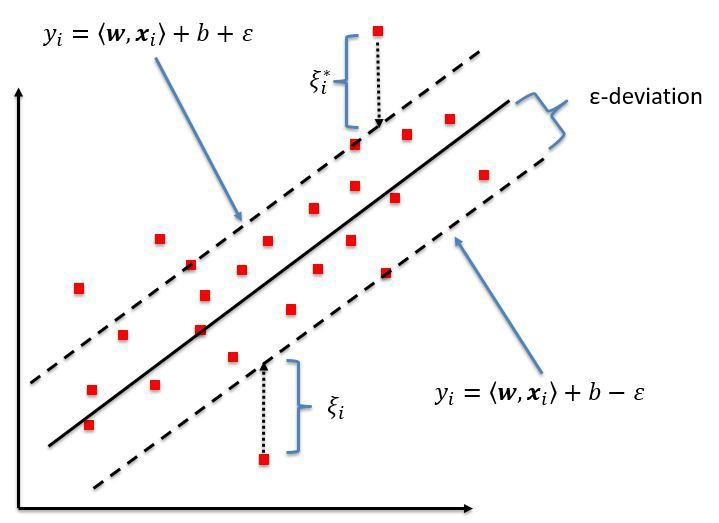

# CODING SECTION

Misalkan kita ingin menganalisa tingkat kejujuran calon karyawan baru. pada pekerjaan yang dia ingin lamar, dia menceritakan bahwa sudah memiliki pengalaman di pekerjaan tersebut selama 16 tahun dan mempunyai gaji sebesar 20 juta rupiah di perusahaan sebelumnya. Kita ingin melakukan pengecekan terhadap pernyataan calon karyawan tersebut. kita melakukan pengecekan terhadap data-data karyawan yang bekerja di bidang yang sama, yang sudah kita ambil dari situs pencarian kerja. Data dibawah ini adalah data gaji karyawan-karyawan terhadap lama pengalaman mereka bekerja.

In [93]:
import numpy as np #aljabar linear
import pandas as pd #pengolahan data
import matplotlib.pyplot as plt #visualisasi
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv('salary.csv') #membaca data

In [95]:
df.head(10)

,ID,pengalaman,gaji
0,54940,9.2,19.611
1,55100,18.5,39.167
2,54794,10.5,26.111
3,54650,18.9,44.833
4,54728,4.0,21.889
5,54992,16.0,19.889
6,54888,2.5,14.389
7,54840,0.3,5.667
8,54638,18.6,36.722
9,54682,14.4,22.333


In [84]:
#mengubah data menjadi array agar bisa dilakukan proses machine learning
X = df.pengalaman.values.reshape(-1,1) 
y = df.gaji.values

In [85]:
#Memisah data untuk proses data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/4, random_state = 42)

In [86]:
#import algoritma dari scikit-learn
from sklearn.svm import SVR
model = SVR(gamma = 'auto',  kernel='rbf')
#memuat machine learning terhadap data latih
model.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Visualisasi

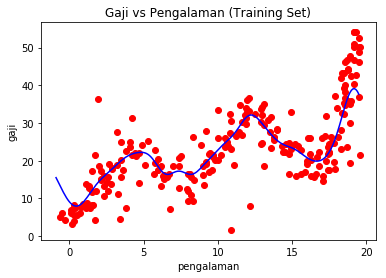

In [91]:
# data latih
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Gaji vs Pengalaman (Training Set)')
plt.xlabel('pengalaman')
plt.ylabel('gaji')
plt.show()

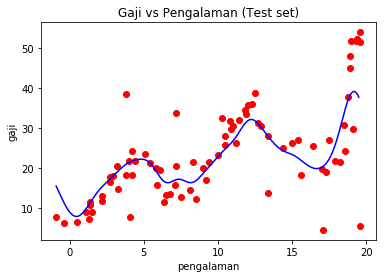

In [92]:
#data uji

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Gaji vs Pengalaman (Test set)')
plt.xlabel('pengalaman')
plt.ylabel('gaji')
plt.show()

In [90]:
model.predict(np.array(16).reshape(1,-1))


array([20.84903171])

# Kesimpulan

SVR menghasilkan prediksi yang lebih akurat dari regresi linear. Selain itu, SVR mempunyai banyak parameter yang bisa disetel, sehingga bisa lebih menyesuaikan terhadap penyebaran dataset, seperti masalah non-linear. Namun, harus diperhatikan dalam masalah non-linear problem dan pemilihan kernel seperti rbf, algoritma SVR akan menjadi lebih kompleks dan sulit diinterpretasikan. SVR juga mempunyai masalah dalam waktu komputasi/training yang cukup lama dalam masalah non-linear.